<a href="https://colab.research.google.com/github/u1353279/MetOffice/blob/main/Findings_for_Little_rissington_vs_Monk_Woods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Little Rissington***



Data Analysis

Import Libraries

In [81]:
import pandas as pd
import numpy as np

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

Import dataset

In [82]:
little_rissington=pd.read_excel('/content/drive/MyDrive/PHD/little_rissington.xlsx')

In [83]:
little_rissington.head()

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Global Radiation (KJ/m2)
0,01/01/2010,0.3,-3.5,-1.60,0.0,10.0,19.0,5425.0
1,02/01/2010,3.9,-3.3,0.30,0.0,8.0,18.0,4761.0
2,03/01/2010,0.9,-2.0,-0.55,0.0,9.0,19.0,5416.0
3,04/01/2010,0.2,-7.7,-3.75,0.2,6.0,10.0,6301.0
4,05/01/2010,-0.1,-6.4,-3.25,8.0,7.0,15.0,2318.0


Set Date feature to correct type

In [84]:
little_rissington['Date'] = pd.to_datetime(little_rissington['Date'], format='%d/%m/%Y')

Rename coloumns

In [85]:
little_rissington.rename(columns={'Daily Maximum Temperature (0900-0900) (°C)': 'Max Temp',
                   'Daily Minimum Temperature (0900-0900) (°C)': 'Min Temp',
                  'Daily Mean Temperature (0900-0900) (°C)': 'Mean Temp',
          'Daily Total Rainfall (0900-0900)(mm)': 'Rainfall(mm)',
          'Daily Mean Windspeed (0100-2400) (kn)': 'Windspeed(kn)',
          'Daily Maximum Gust (0100-2400) (kn)': 'Max Gust(kn)',
          'Daily Total Global Radiation (KJ/m2)': 'Radiation(KJ/m2)'},
          inplace=True)

Check and deal with null values

In [86]:
little_rissington.isnull().sum()

Date                 0
Max Temp            17
Min Temp            17
Mean Temp           21
Rainfall(mm)         0
Windspeed(kn)       31
Max Gust(kn)        31
Radiation(KJ/m2)    34
dtype: int64

In [87]:
# only show the missing values
little_rissington[little_rissington.filter(like='Max Temp').isnull().any(1)]

,Date,Max Temp,Min Temp,Mean Temp,Rainfall(mm),Windspeed(kn),Max Gust(kn),Radiation(KJ/m2)
2478,2016-10-14,NaN,6.7,NaN,0.0,NaN,NaN,NaN
2479,2016-10-15,NaN,NaN,NaN,9.6,NaN,NaN,NaN
2480,2016-10-16,NaN,NaN,NaN,0.2,NaN,NaN,NaN
2481,2016-10-17,NaN,NaN,NaN,1.6,NaN,NaN,NaN
2482,2016-10-18,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2483,2016-10-19,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3500,2019-08-02,NaN,13.8,NaN,0.0,NaN,NaN,NaN
3501,2019-08-03,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3502,2019-08-04,NaN,NaN,NaN,0.6,NaN,NaN,NaN
3503,2019-08-05,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [88]:
#propogate the last valid observation forward
little_rissington.ffill()

,Date,Max Temp,Min Temp,Mean Temp,Rainfall(mm),Windspeed(kn),Max Gust(kn),Radiation(KJ/m2)
0,2010-01-01,0.3,-3.5,-1.60,0.0,10.0,19.0,5425.0
1,2010-01-02,3.9,-3.3,0.30,0.0,8.0,18.0,4761.0
2,2010-01-03,0.9,-2.0,-0.55,0.0,9.0,19.0,5416.0
3,2010-01-04,0.2,-7.7,-3.75,0.2,6.0,10.0,6301.0
4,2010-01-05,-0.1,-6.4,-3.25,8.0,7.0,15.0,2318.0
...,...,...,...,...,...,...,...,...
3647,2019-12-27,7.5,2.9,5.20,0.4,6.0,15.0,1348.0
3648,2019-12-28,8.5,4.7,6.60,0.0,10.0,20.0,1285.0
3649,2019-12-29,6.9,5.5,6.20,0.0,13.0,23.0,1651.0
3650,2019-12-30,7.6,4.1,5.85,0.0,11.0,20.0,3075.0


In [89]:
little_rissington.ffill(inplace=True)

Extract Month and Year colUMn

In [90]:
little_rissington['month'] = little_rissington['Date'].dt.month

In [91]:
little_rissington['year'] = little_rissington['Date'].dt.year

Visulaise each feature against the date column

In [92]:
import plotly.express as px
fig=px.line(little_rissington, x=little_rissington.Date, y='Max Temp', title='Max Temp Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [93]:
import plotly.express as px
fig=px.line(little_rissington, x=little_rissington.Date, y='Min Temp', title='Min Temp Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [94]:
import plotly.express as px
fig=px.line(little_rissington, x=little_rissington.Date, y='Mean Temp', title='Mean Temp Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [95]:
import plotly.express as px
fig=px.line(little_rissington, x=little_rissington.Date, y='Rainfall(mm)', title='Rainfall Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [96]:
import plotly.express as px
fig=px.line(little_rissington, x=little_rissington.Date, y='Windspeed(kn)', title='Windspeed (kn) Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [97]:
import plotly.express as px
fig=px.line(little_rissington, x=little_rissington.Date, y='Max Gust(kn)', title='Max Gust(kn) Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [98]:
import plotly.express as px
fig=px.line(little_rissington, x=little_rissington.Date, y='Radiation(KJ/m2)', title='Radiation(KJ/m2) Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [99]:
#https://towardsdatascience.com/most-useful-python-functions-for-time-series-analysis-ed1a9cb3aa8b

In [100]:
# day 2

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [102]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [103]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [104]:
Max_temp_Little_Rissington = little_rissington['Max Temp']

In [105]:
Max_temp_Little_Rissington

0       0.3
1       3.9
2       0.9
3       0.2
4      -0.1
       ... 
3647    7.5
3648    8.5
3649    6.9
3650    7.6
3651    7.0
Name: Max Temp, Length: 3652, dtype: float64

<function matplotlib.pyplot.figure>

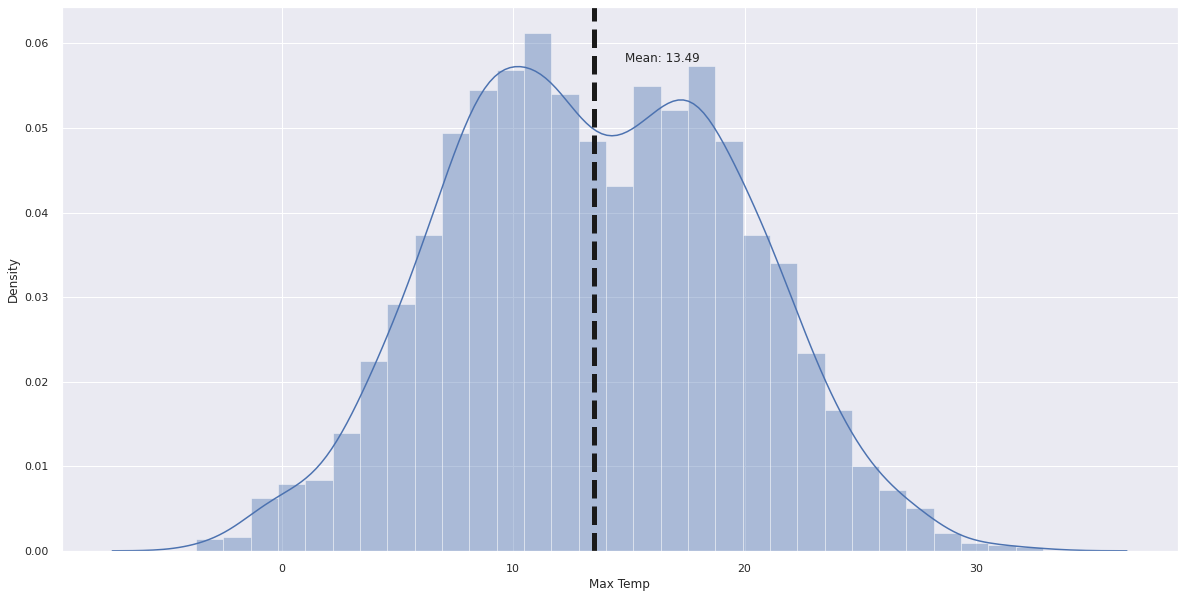

In [106]:
plot_distribution(Max_temp_Little_Rissington)

Monks Wood

In [107]:
Monks_Wood=pd.read_excel('/content/drive/MyDrive/PHD/Monks Wood.xlsx')

In [108]:
Monks_Wood.head()

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Global Radiation (KJ/m2)
0,01/01/2010,2.4,-2.5,-0.05,0.2,4.0,11.0,3019.0
1,02/01/2010,2.6,-2.7,-0.05,3.6,4.0,15.0,1591.0
2,03/01/2010,2.0,-3.3,-0.65,0.0,2.0,8.0,4034.0
3,04/01/2010,2.7,-5.7,-1.50,0.2,4.0,15.0,3991.0
4,05/01/2010,1.7,-4.0,-1.15,0.0,5.0,13.0,2035.0


In [109]:
Monks_Wood['Date'] = pd.to_datetime(Monks_Wood['Date'], format='%d/%m/%Y')

In [110]:
Monks_Wood.rename(columns={'Daily Maximum Temperature (0900-0900) (°C)': 'Max Temp',
                   'Daily Minimum Temperature (0900-0900) (°C)': 'Min Temp',
                  'Daily Mean Temperature (0900-0900) (°C)': 'Mean Temp',
          'Daily Total Rainfall (0900-0900)(mm)': 'Rainfall(mm)',
          'Daily Mean Windspeed (0100-2400) (kn)': 'Windspeed(kn)',
          'Daily Maximum Gust (0100-2400) (kn)': 'Max Gust(kn)',
          'Daily Total Global Radiation (KJ/m2)': 'Radiation(KJ/m2)'},
          inplace=True)

In [111]:
Monks_Wood.isnull().sum()

Date                 0
Max Temp            44
Min Temp            43
Mean Temp           45
Rainfall(mm)        93
Windspeed(kn)       53
Max Gust(kn)        52
Radiation(KJ/m2)    55
dtype: int64

In [112]:
# only show the missing values
Monks_Wood[Monks_Wood.filter(like='Max Temp').isnull().any(1)]

,Date,Max Temp,Min Temp,Mean Temp,Rainfall(mm),Windspeed(kn),Max Gust(kn),Radiation(KJ/m2)
2407,2016-08-04,NaN,14.0,NaN,0.8,NaN,NaN,NaN
2408,2016-08-05,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2409,2016-08-06,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2410,2016-08-07,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2411,2016-08-08,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2412,2016-08-09,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2413,2016-08-10,NaN,NaN,NaN,1.2,NaN,NaN,NaN
2414,2016-08-11,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2415,2016-08-12,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2416,2016-08-13,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [113]:
#propogate the last valid observation forward
Monks_Wood.ffill()

,Date,Max Temp,Min Temp,Mean Temp,Rainfall(mm),Windspeed(kn),Max Gust(kn),Radiation(KJ/m2)
0,2010-01-01,2.4,-2.5,-0.05,0.2,4.0,11.0,3019.0
1,2010-01-02,2.6,-2.7,-0.05,3.6,4.0,15.0,1591.0
2,2010-01-03,2.0,-3.3,-0.65,0.0,2.0,8.0,4034.0
3,2010-01-04,2.7,-5.7,-1.50,0.2,4.0,15.0,3991.0
4,2010-01-05,1.7,-4.0,-1.15,0.0,5.0,13.0,2035.0
...,...,...,...,...,...,...,...,...
3647,2019-12-27,7.3,5.1,6.20,0.2,3.0,11.0,712.0
3648,2019-12-28,9.2,4.8,7.00,0.0,7.0,17.0,1637.0
3649,2019-12-29,8.6,6.2,7.40,0.2,9.0,20.0,2539.0
3650,2019-12-30,8.9,2.8,5.85,0.2,9.0,25.0,3696.0


In [114]:
Monks_Wood.ffill(inplace=True)

In [115]:
Monks_Wood['month'] = Monks_Wood['Date'].dt.month
Monks_Wood['year'] = Monks_Wood['Date'].dt.year

In [116]:
import plotly.express as px
fig=px.line(Monks_Wood, x=Monks_Wood.Date, y='Max Temp', title='Max Temp Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [117]:
import plotly.express as px
fig=px.line(Monks_Wood, x=Monks_Wood.Date, y='Min Temp', title='Min Temp Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [118]:
import plotly.express as px
fig=px.line(Monks_Wood, x=Monks_Wood.Date, y='Mean Temp', title='Mean Temp Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [119]:
import plotly.express as px
fig=px.line(Monks_Wood, x=Monks_Wood.Date, y='Rainfall(mm)', title='Rainfall Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [120]:
import plotly.express as px
fig=px.line(Monks_Wood, x=Monks_Wood.Date, y='Windspeed(kn)', title='Windspeed (kn) Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [121]:
import plotly.express as px
fig=px.line(Monks_Wood, x=Monks_Wood.Date, y='Max Gust(kn)', title='Max Gust(kn) Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [122]:
import plotly.express as px
fig=px.line(Monks_Wood, x=Monks_Wood.Date, y='Radiation(KJ/m2)', title='Radiation(KJ/m2) Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [123]:
Max_temp_Monks_Wood = Monks_Wood['Max Temp']

In [124]:
Max_temp_Monks_Wood

0       2.4
1       2.6
2       2.0
3       2.7
4       1.7
       ... 
3647    7.3
3648    9.2
3649    8.6
3650    8.9
3651    8.4
Name: Max Temp, Length: 3652, dtype: float64

<function matplotlib.pyplot.figure>

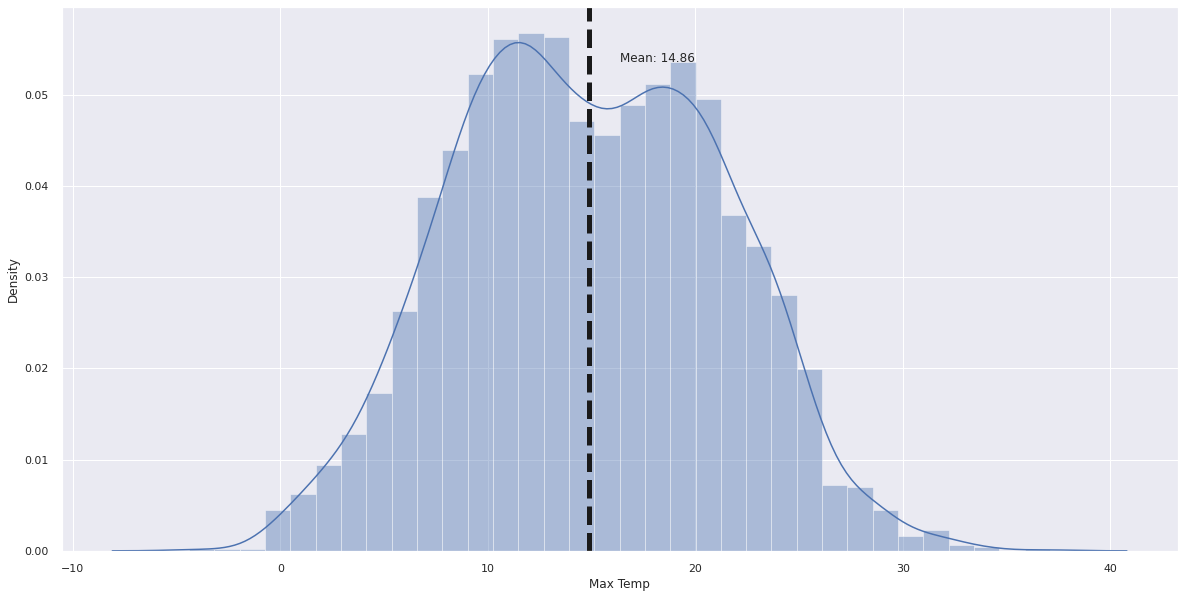

In [125]:
plot_distribution(Max_temp_Monks_Wood)

Max temp Little Rissington vs Monks Wood Distribution

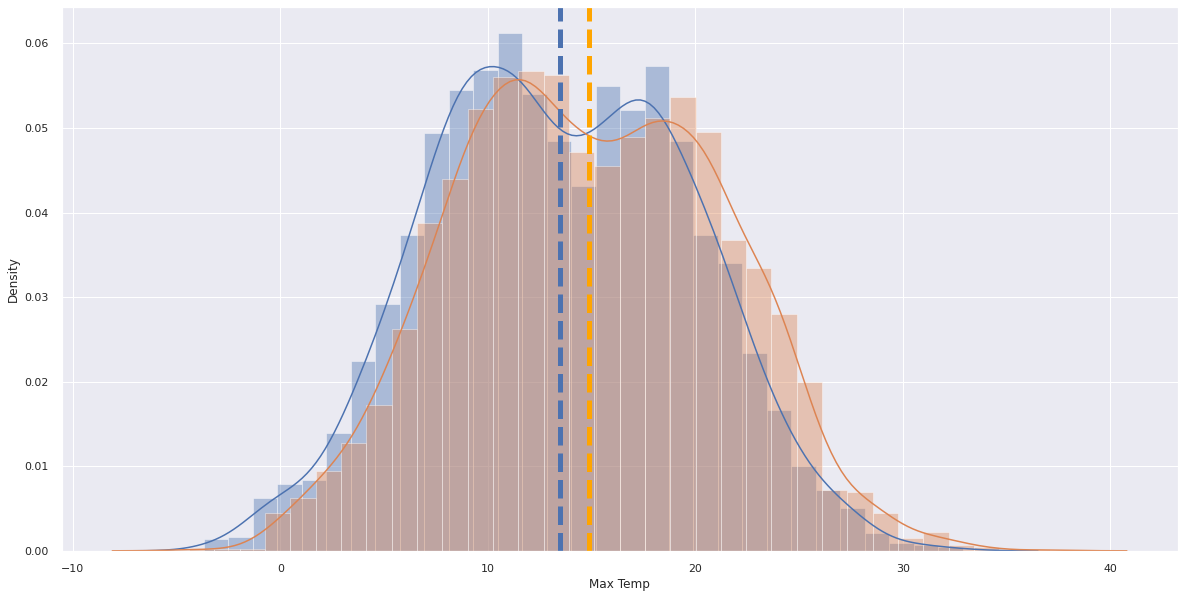

In [126]:
plt.figure()
ax1 = sns.distplot(Max_temp_Little_Rissington)
ax2 = sns.distplot(Max_temp_Monks_Wood)
plt.axvline(np.mean(Max_temp_Little_Rissington), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Max_temp_Monks_Wood), color='orange', linestyle='dashed', linewidth=5)

Function For T-test

In [127]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')


In [128]:
sample_size = 2000
Little_Rissington_sampled = np.random.choice(Max_temp_Little_Rissington, sample_size)
Monks_Wood_sampled = np.random.choice(Max_temp_Monks_Wood, sample_size)
compare_2_groups(Little_Rissington_sampled, Monks_Wood_sampled, 0.05, sample_size)

Statistics=-6.846, p=0.000
Different distributions (reject H0)


With sample=2000 we reject the null hypothesis meaning there is a significant difference in the means of the daily Max temp for the two Locations 

Statistical Testing on Min Temp

In [129]:
Min_temp_Little_Rissington=little_rissington['Min Temp']
Min_temp_Monks_Wood=Monks_Wood['Min Temp']

<function matplotlib.pyplot.figure>

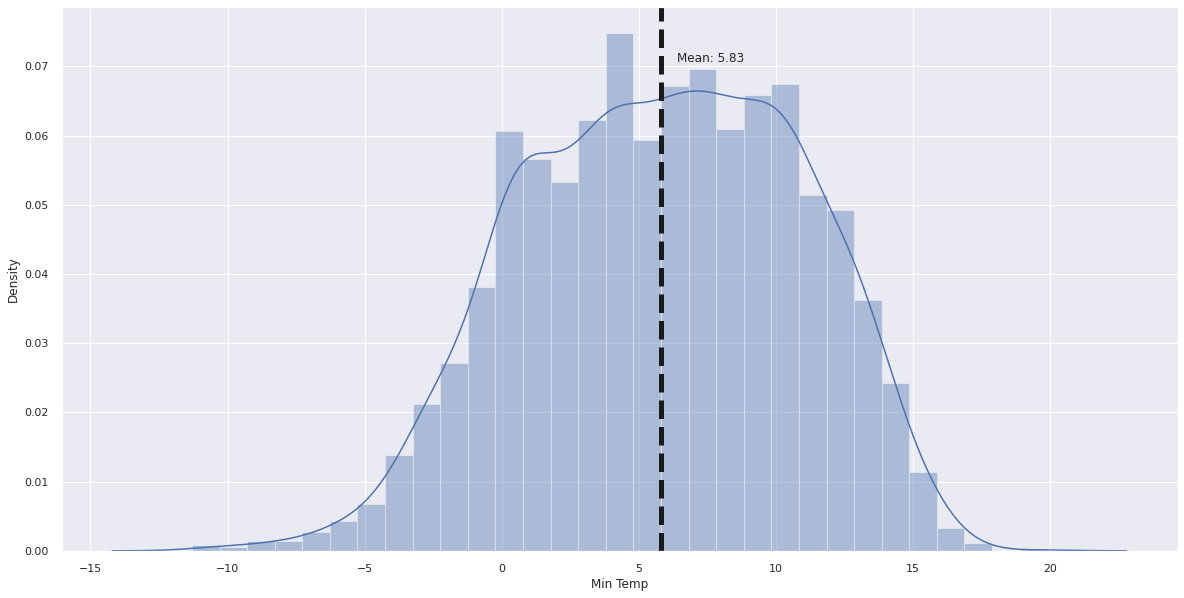

In [130]:
plot_distribution(Min_temp_Little_Rissington)

<function matplotlib.pyplot.figure>

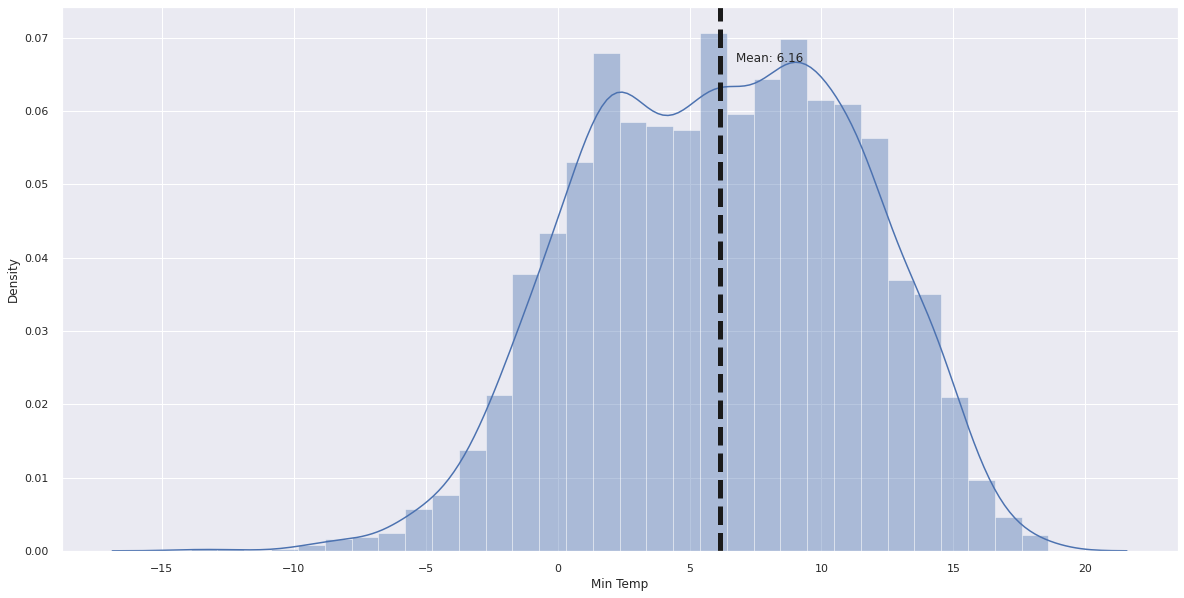

In [131]:
plot_distribution(Min_temp_Monks_Wood)

Min temp Little Rissington vs Monks Wood Distribution

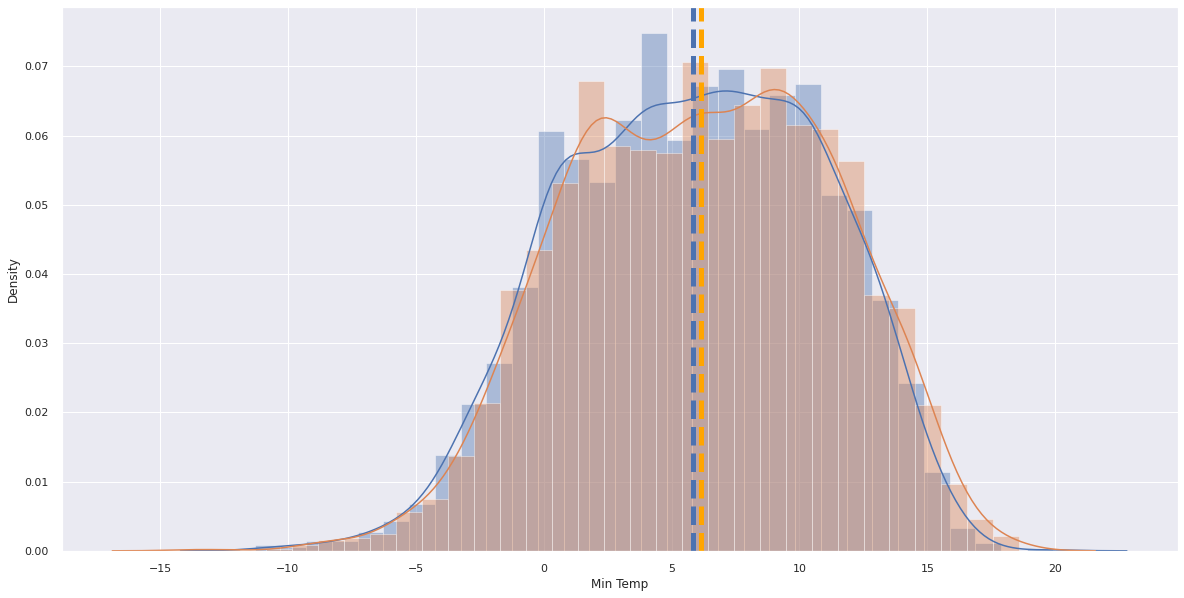

In [132]:
plt.figure()
ax1 = sns.distplot(Min_temp_Little_Rissington)
ax2 = sns.distplot(Min_temp_Monks_Wood)
plt.axvline(np.mean(Min_temp_Little_Rissington), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Min_temp_Monks_Wood), color='orange', linestyle='dashed', linewidth=5)

T-test Min Temp Little rissington vs Monks Wood

In [133]:
sample_size = 2000
Little_Rissington_sampled = np.random.choice(Min_temp_Little_Rissington, sample_size)
Monks_Wood_sampled = np.random.choice(Min_temp_Monks_Wood, sample_size)
compare_2_groups(Little_Rissington_sampled, Monks_Wood_sampled, 0.05, sample_size)

Statistics=-2.316, p=0.021
Different distributions (reject H0)


With sample=2000 we reject the null hypothesis meaning there is a significant difference in the means of the daily Min temp for the two Locations 

Statistical Testing on Mean Temp

In [134]:
Mean_temp_Little_Rissington=little_rissington['Mean Temp']
Mean_temp_Monks_Wood=Monks_Wood['Mean Temp']

<function matplotlib.pyplot.figure>

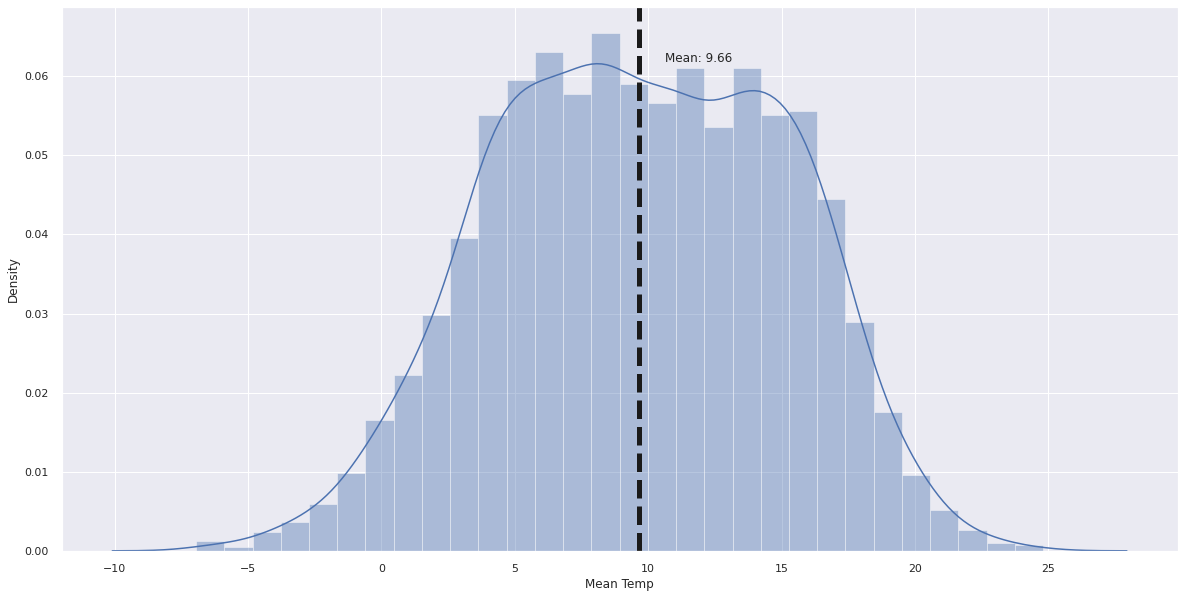

In [135]:
plot_distribution(Mean_temp_Little_Rissington)

<function matplotlib.pyplot.figure>

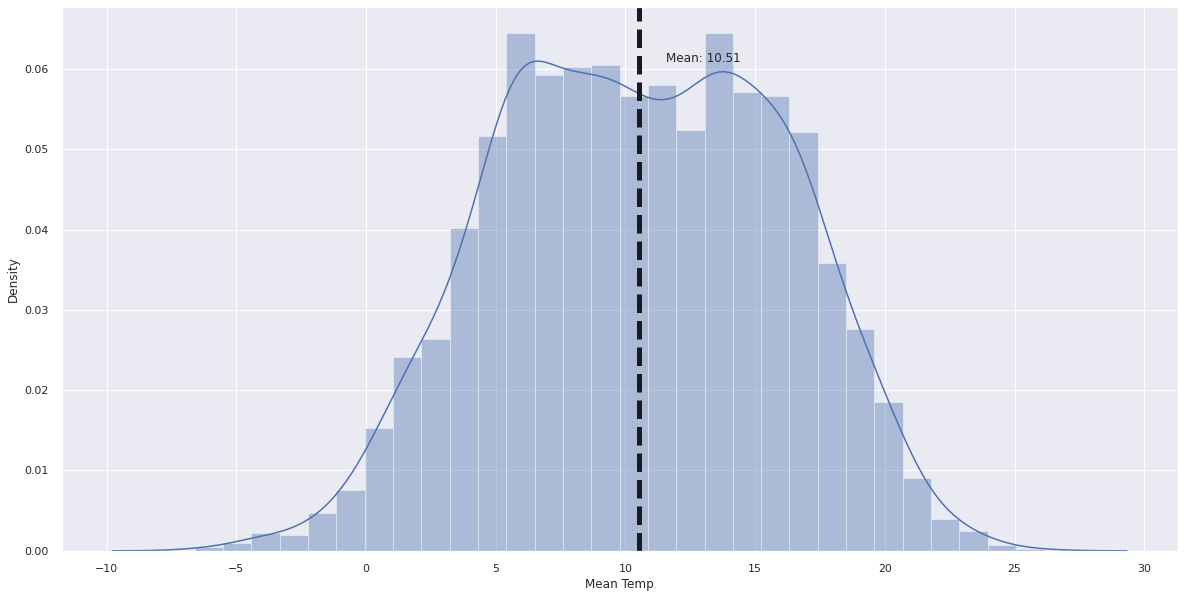

In [136]:
plot_distribution(Mean_temp_Monks_Wood)

Mean Temp distributon Comparison

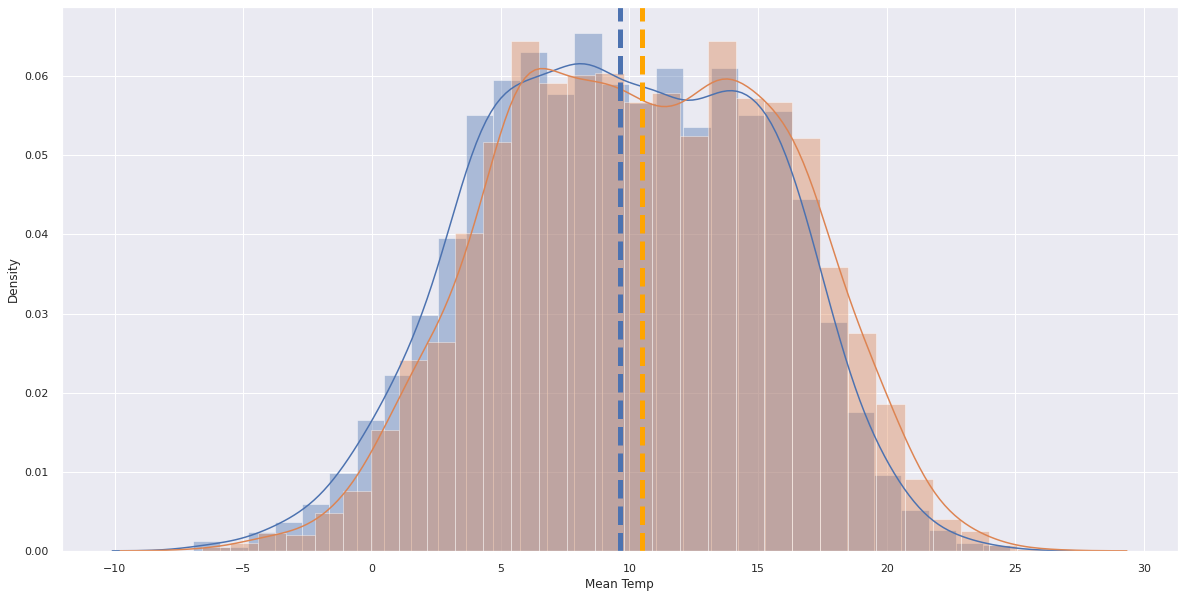

In [137]:
plt.figure()
ax1 = sns.distplot(Mean_temp_Little_Rissington)
ax2 = sns.distplot(Mean_temp_Monks_Wood)
plt.axvline(np.mean(Mean_temp_Little_Rissington), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Mean_temp_Monks_Wood), color='orange', linestyle='dashed', linewidth=5)

T-test Mean Temp Little rissington vs Monks Wood

In [138]:
sample_size = 2000
Little_Rissington_sampled = np.random.choice(Mean_temp_Little_Rissington, sample_size)
Monks_Wood_sampled = np.random.choice(Mean_temp_Monks_Wood, sample_size)
compare_2_groups(Little_Rissington_sampled, Monks_Wood_sampled, 0.05, sample_size)

Statistics=-4.506, p=0.000
Different distributions (reject H0)


With sample=2000 we reject the null hypothesis meaning there is a significant difference in the means of the daily Mean temp for the two Locations 

Statistical Testing on Rainfall (mm)

In [139]:
Rainfall_Little_Rissington=little_rissington['Rainfall(mm)']
Rainfall_Monks_Wood=Monks_Wood['Rainfall(mm)']

<function matplotlib.pyplot.figure>

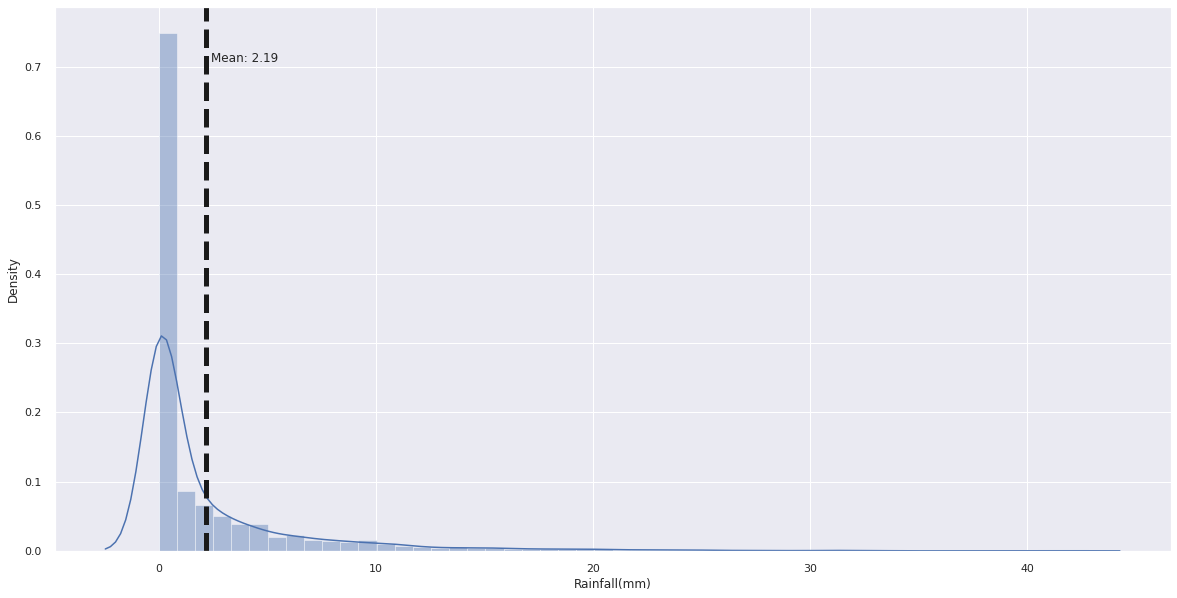

In [140]:
plot_distribution(Rainfall_Little_Rissington)

<function matplotlib.pyplot.figure>

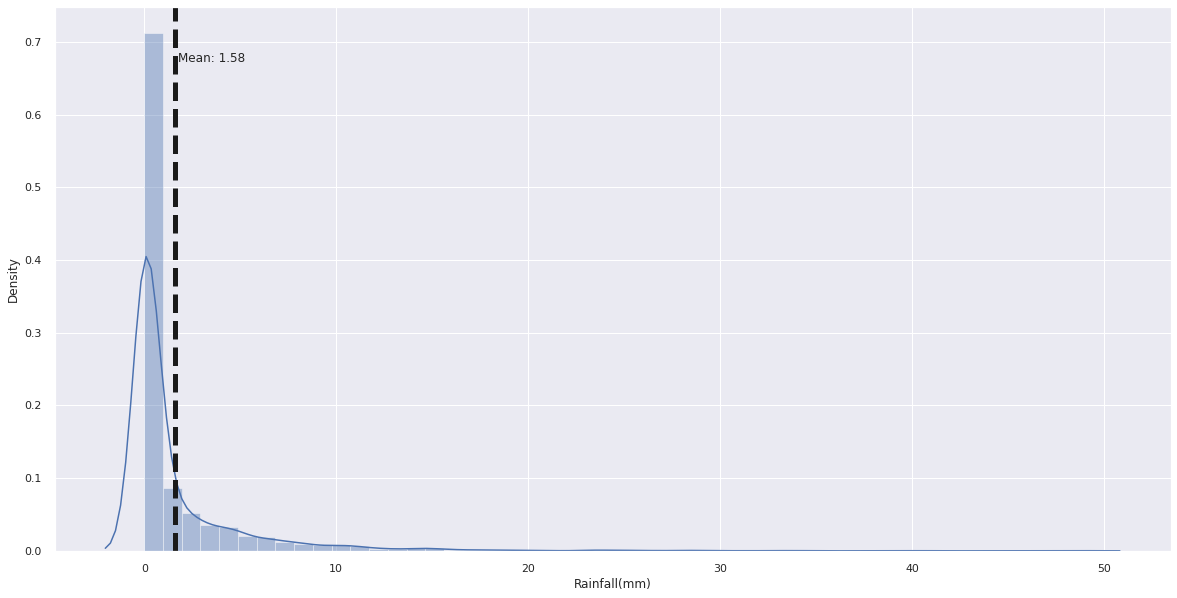

In [141]:
plot_distribution(Rainfall_Monks_Wood)

Rainfall distribution comparison

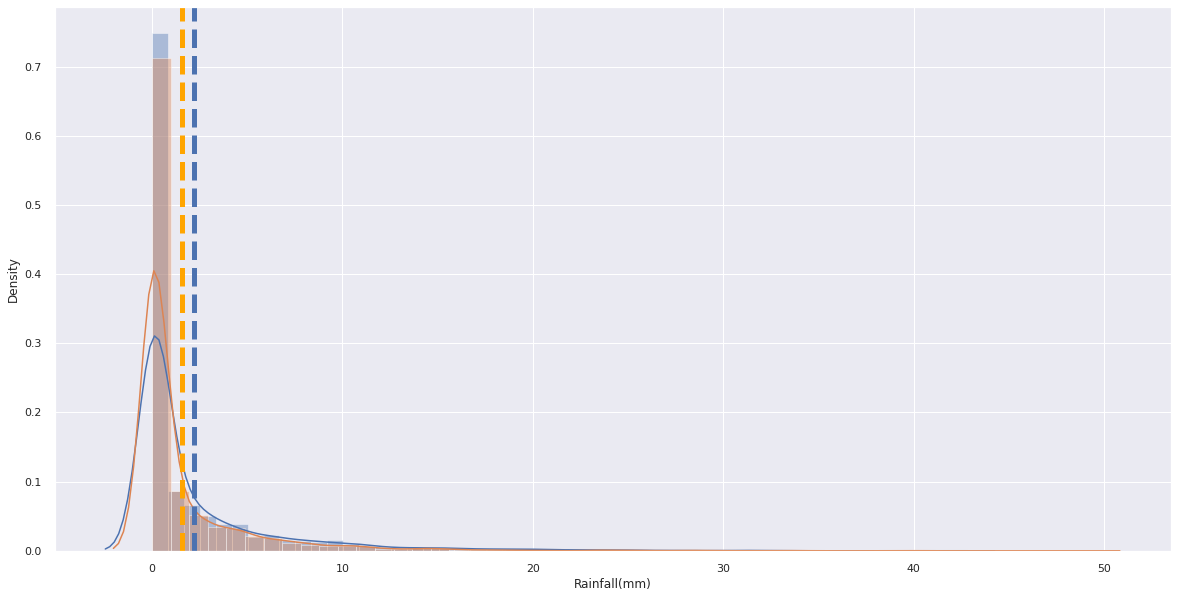

In [142]:
plt.figure()
ax1 = sns.distplot(Rainfall_Little_Rissington)
ax2 = sns.distplot(Rainfall_Monks_Wood)
plt.axvline(np.mean(Rainfall_Little_Rissington), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Rainfall_Monks_Wood), color='orange', linestyle='dashed', linewidth=5)

T-test Rainfall Little rissington vs Monks Wood

In [143]:
sample_size = 2000
Little_Rissington_sampled = np.random.choice(Rainfall_Little_Rissington, sample_size)
Monks_Wood_sampled = np.random.choice(Rainfall_Monks_Wood, sample_size)
compare_2_groups(Little_Rissington_sampled, Monks_Wood_sampled, 0.05, sample_size)

Statistics=4.469, p=0.000
Different distributions (reject H0)


With sample=2000 we reject the null hypothesis meaning there is a significant difference in the means of the daily Rainfall for the two Locations 

Statistical Testing on Windspeed (Kn)

In [144]:
Windspeed_Little_Rissington=little_rissington['Windspeed(kn)']
Windspeed_Monks_Wood=Monks_Wood['Windspeed(kn)']

<function matplotlib.pyplot.figure>

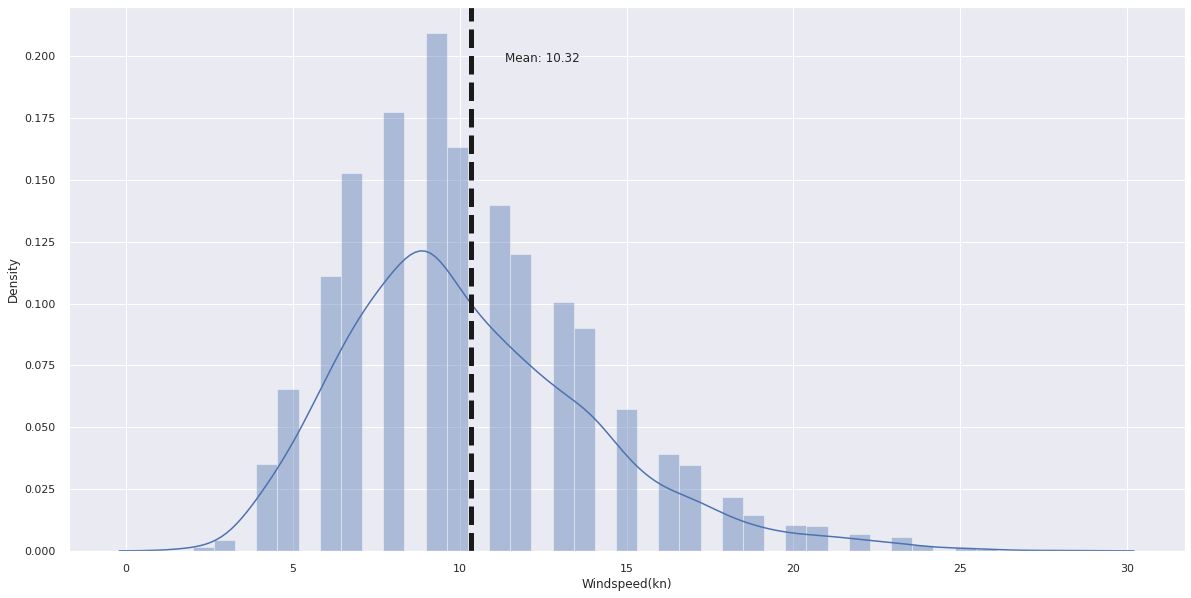

In [145]:
plot_distribution(Windspeed_Little_Rissington)

<function matplotlib.pyplot.figure>

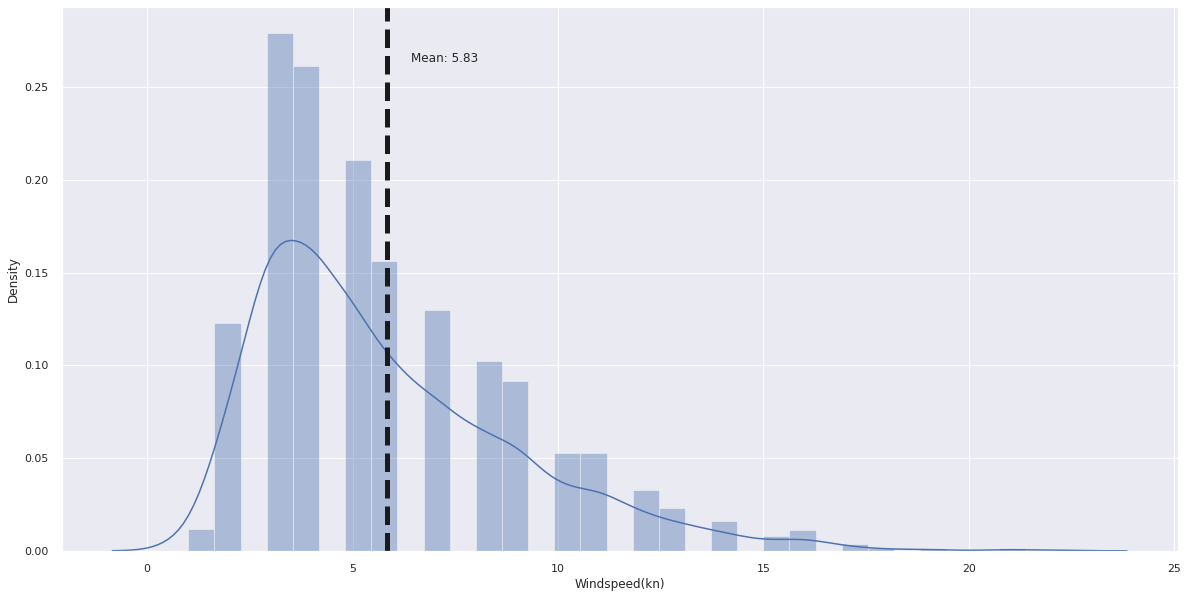

In [146]:
plot_distribution(Windspeed_Monks_Wood)

Windspeed distribution comparison

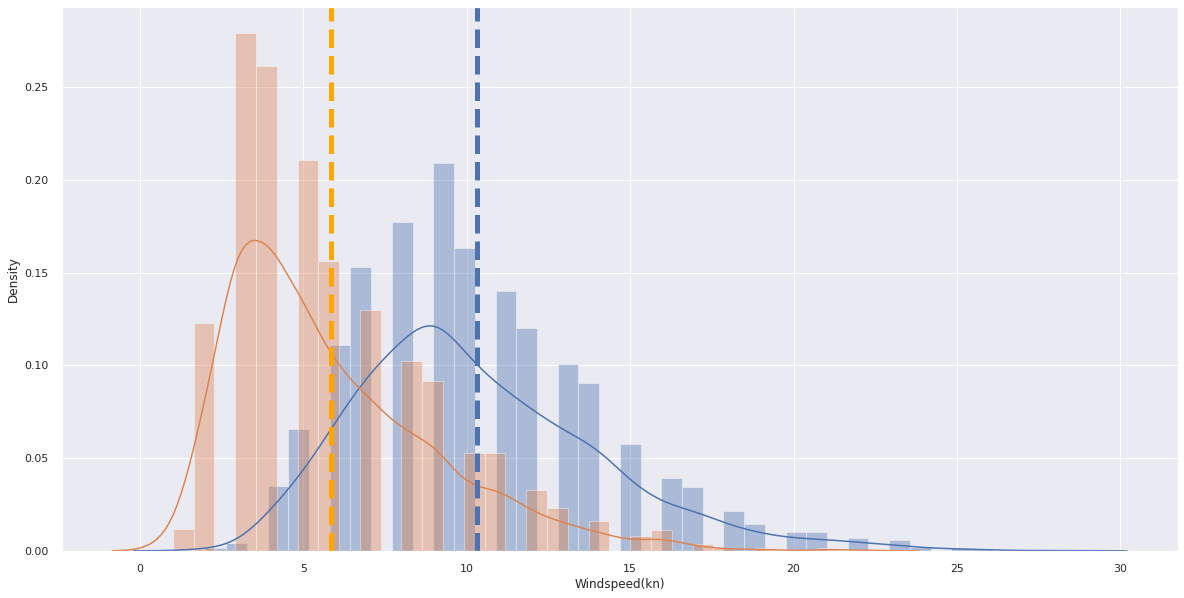

In [147]:
plt.figure()
ax1 = sns.distplot(Windspeed_Little_Rissington)
ax2 = sns.distplot(Windspeed_Monks_Wood)
plt.axvline(np.mean(Windspeed_Little_Rissington), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Windspeed_Monks_Wood), color='orange', linestyle='dashed', linewidth=5)

T-test Windspeed Little rissington vs Monks Wood

In [148]:
sample_size = 2000
Little_Rissington_sampled = np.random.choice(Windspeed_Little_Rissington, sample_size)
Monks_Wood_sampled = np.random.choice(Windspeed_Monks_Wood, sample_size)
compare_2_groups(Little_Rissington_sampled, Monks_Wood_sampled, 0.05, sample_size)

Statistics=40.434, p=0.000
Different distributions (reject H0)


With sample=2000 we reject the null hypothesis meaning there is a significant difference in the means of the daily Windspeed for the two Locations 

Statistical Testing on Max Gust(Kn)

In [149]:
Max_Gust_Little_Rissington=little_rissington['Max Gust(kn)']
Max_Gust_Monks_Wood=Monks_Wood['Max Gust(kn)']

<function matplotlib.pyplot.figure>

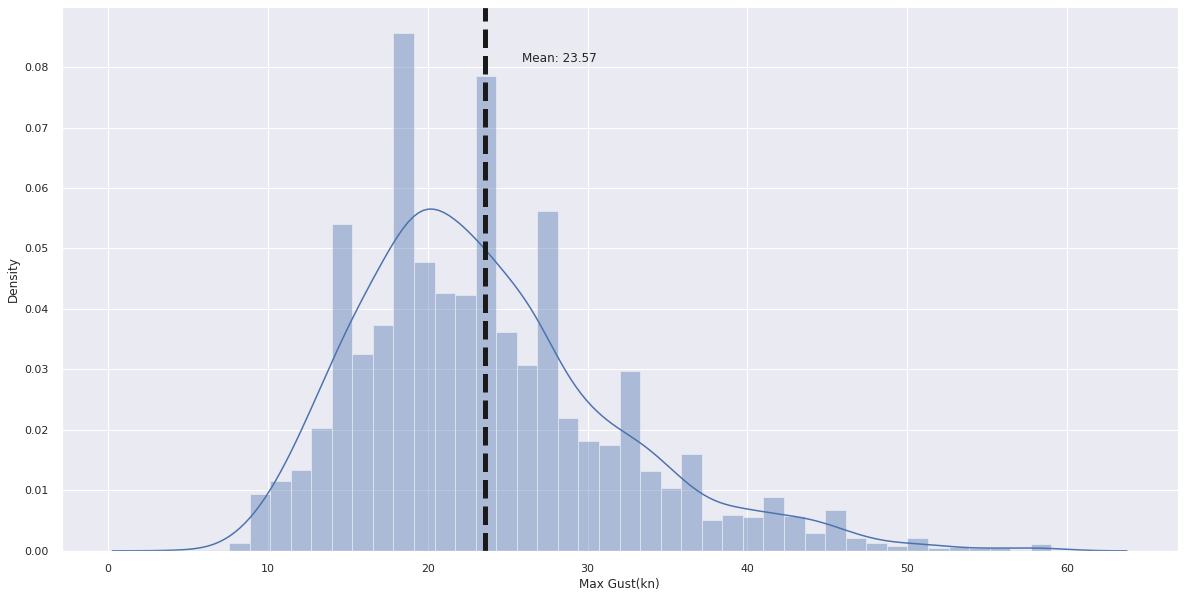

In [150]:
plot_distribution(Max_Gust_Little_Rissington)

<function matplotlib.pyplot.figure>

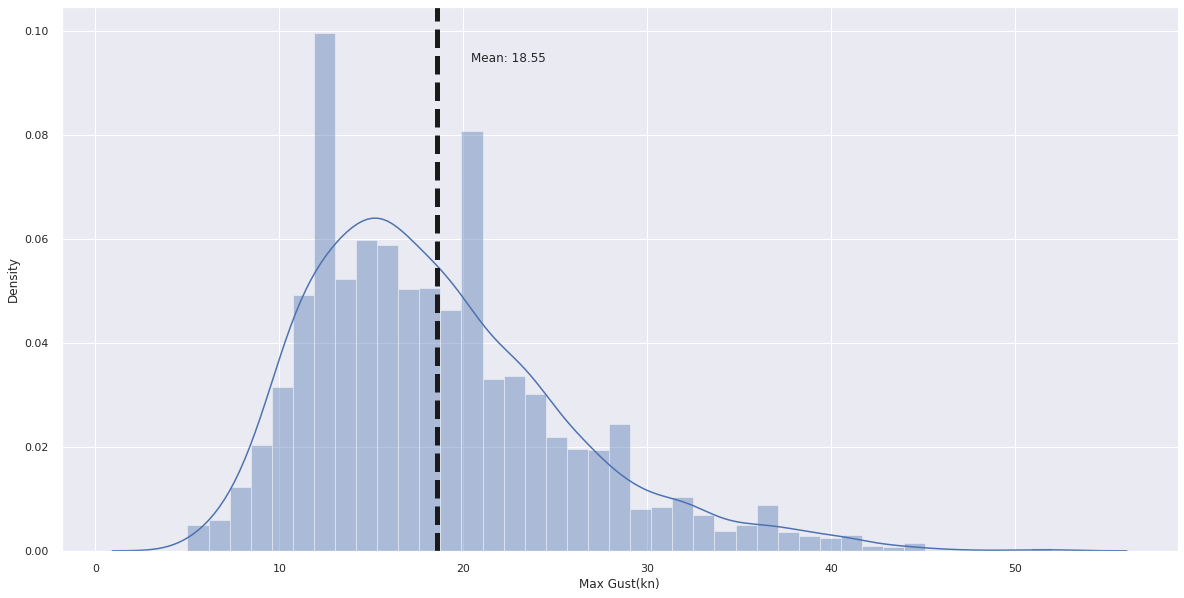

In [151]:
plot_distribution(Max_Gust_Monks_Wood)

Max Gust Distribution Comparison

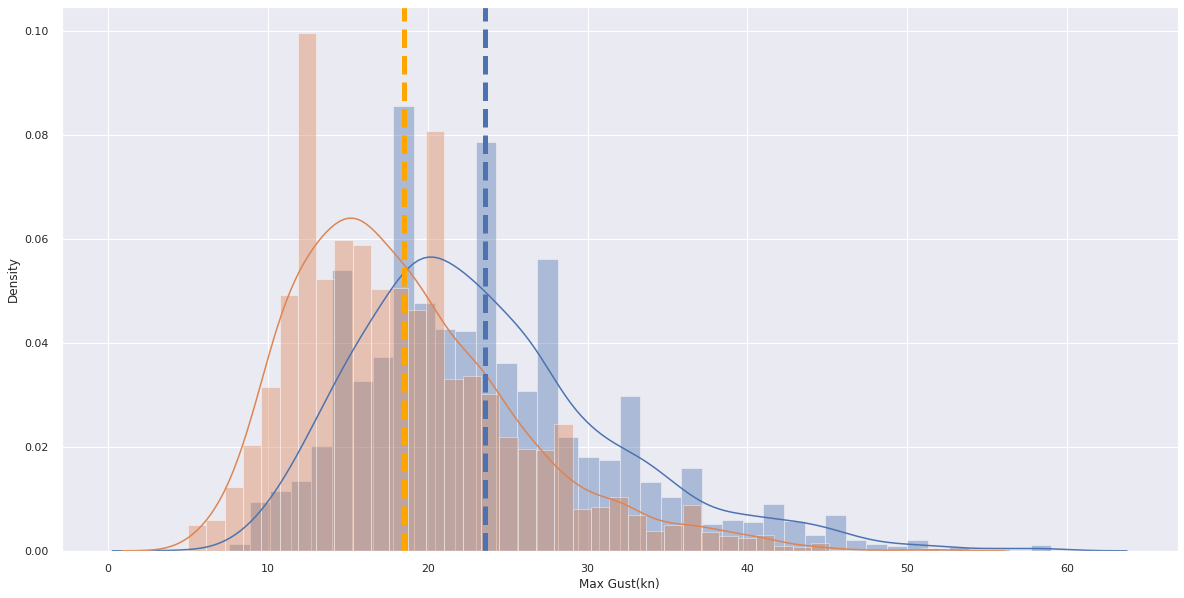

In [152]:
plt.figure()
ax1 = sns.distplot(Max_Gust_Little_Rissington)
ax2 = sns.distplot(Max_Gust_Monks_Wood)
plt.axvline(np.mean(Max_Gust_Little_Rissington), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Max_Gust_Monks_Wood), color='orange', linestyle='dashed', linewidth=5)

T-test Max Gust Little rissington vs Monks Wood

In [153]:
sample_size = 2000
Little_Rissington_sampled = np.random.choice(Max_Gust_Little_Rissington, sample_size)
Monks_Wood_sampled = np.random.choice(Max_Gust_Monks_Wood, sample_size)
compare_2_groups(Little_Rissington_sampled, Monks_Wood_sampled, 0.05, sample_size)

Statistics=21.780, p=0.000
Different distributions (reject H0)


With sample=2000 we reject the null hypothesis meaning there is a significant difference in the means of the daily Max Gust for the two Locations 

Statistical Testing on Radiation (KJ/m2)

In [154]:
Radiation_Little_Rissington=little_rissington['Radiation(KJ/m2)']
Radiation_Monks_Wood=Monks_Wood['Radiation(KJ/m2)']

<function matplotlib.pyplot.figure>

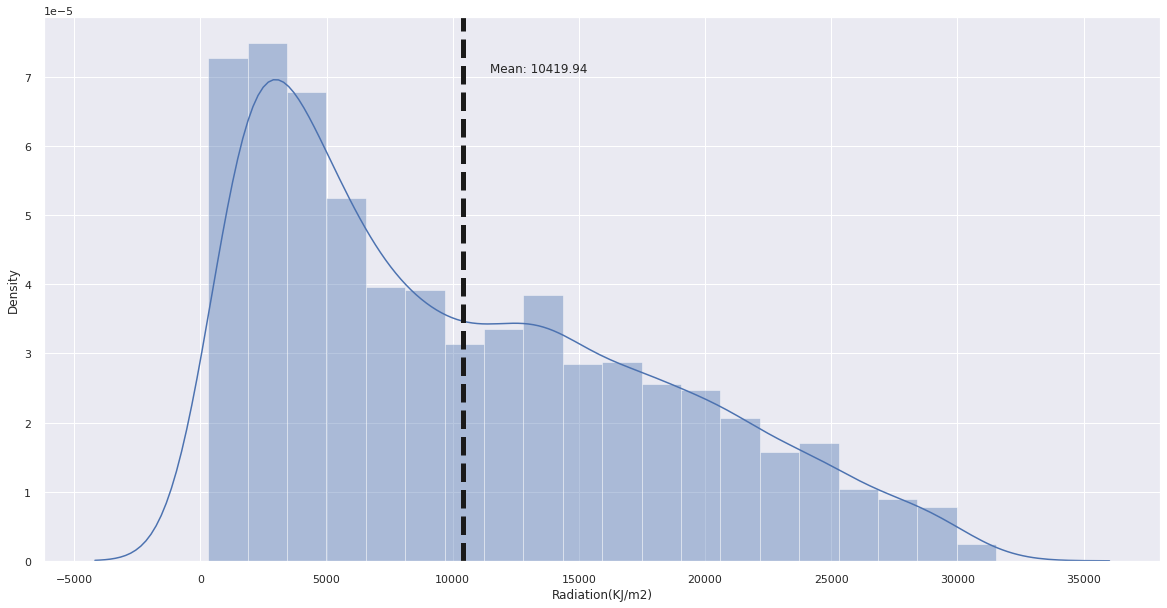

In [155]:
plot_distribution(Radiation_Little_Rissington)

<function matplotlib.pyplot.figure>

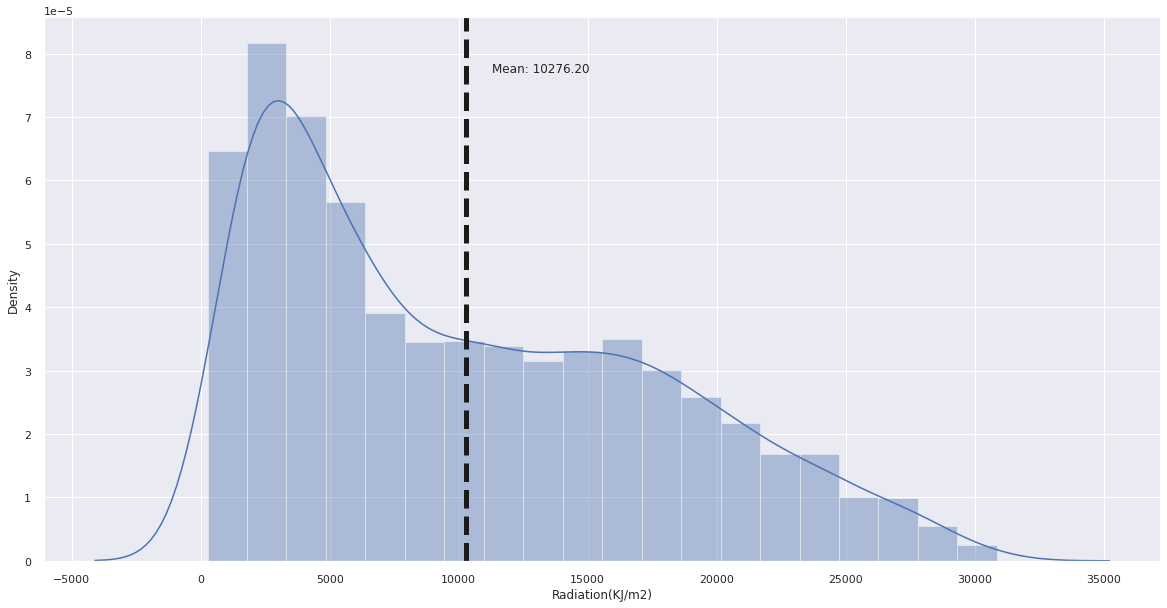

In [156]:
plot_distribution(Radiation_Monks_Wood)

Radiation Distribution Comparison

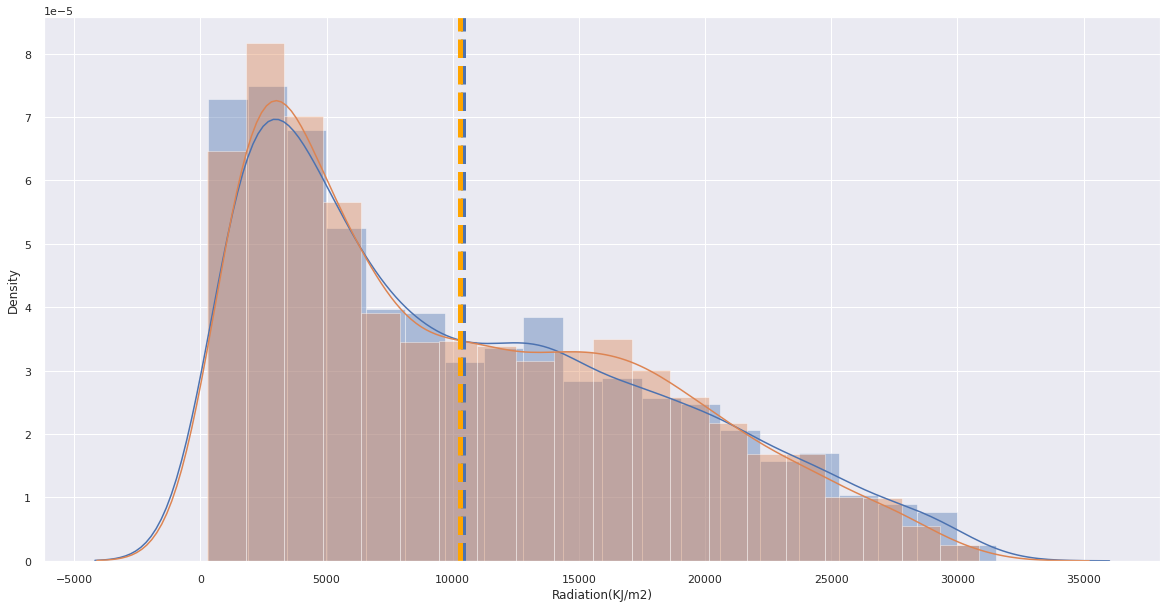

In [157]:
plt.figure()
ax1 = sns.distplot(Radiation_Little_Rissington)
ax2 = sns.distplot(Radiation_Monks_Wood)
plt.axvline(np.mean(Radiation_Little_Rissington), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Radiation_Monks_Wood), color='orange', linestyle='dashed', linewidth=5)

T-test Radiation Little rissington vs Monks Wood

In [158]:
sample_size = 2000
Little_Rissington_sampled = np.random.choice(Radiation_Little_Rissington, sample_size)
Monks_Wood_sampled = np.random.choice(Radiation_Monks_Wood, sample_size)
compare_2_groups(Little_Rissington_sampled, Monks_Wood_sampled, 0.05, sample_size)

Statistics=-0.383, p=0.702
Same distributions (fail to reject H0)


Sample size = 2000, We fail to reject Null Hypothesis. This means the means of the two locations for radiation are the same

 **Findings**

Distance between Little Rissington and Monk Woods = 72.71 Miles.

Radiation level for both locations is the only parameter that can statistically be proven to have the same distribution.

All samples were taken at random with a sample size of 2000 and alpha value as 0.05.